<a href="https://colab.research.google.com/github/CodeHunterOfficial/DL_20241S/blob/main/Lecture_0_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class LinearRegression:

    def __init__(self):
        self.parameters = {}

    def forward_propagation(self, train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m, train_input) + c
        return predictions

    def cost_function(self, predictions, train_output):
        cost = np.mean((train_output - predictions) ** 2)
        return cost

    def backward_propagation(self, train_input, train_output, predictions):
        derivatives = {}
        df = (train_output - predictions) * -1
        dm = np.mean(np.multiply(train_input, df))
        dc = np.mean(df)
        derivatives['dm'] = dm
        derivatives['dc'] = dc
        return derivatives

    def update_parameters(self, derivatives, learning_rate):
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

    def train(self, train_input, train_output, learning_rate, iters):
        # Initialize random parameters
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        # Initialize loss
        self.loss = []

        # Initialize figure and axis for animation
        fig, ax = plt.subplots()
        x_vals = np.linspace(min(train_input), max(train_input), 100)
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals + self.parameters['c'], color='red', label='Regression Line')
        ax.scatter(train_input, train_output, marker='o', color='green', label='Training Data')

        # Set y-axis limits to exclude negative values
        ax.set_ylim(0, max(train_output) + 1)

        def update(frame):
            # Forward propagation
            predictions = self.forward_propagation(train_input)

            # Cost function
            cost = self.cost_function(predictions, train_output)

            # Back propagation
            derivatives = self.backward_propagation(train_input, train_output, predictions)

            # Update parameters
            self.update_parameters(derivatives, learning_rate)

            # Update the regression line
            line.set_ydata(self.parameters['m'] * x_vals + self.parameters['c'])

            # Append loss and print
            self.loss.append(cost)
            print("Iteration = {}, Loss = {}".format(frame + 1, cost))

            return line,

        # Create animation
        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True)

        # Save the animation as a video file (e.g., MP4)
        ani.save('linear_regression_A.mp4', writer='ffmpeg')

        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.title('Linear Regression')
        plt.legend()
        plt.show()

        return self.parameters, self.loss


        x          y
0    24.0  21.549452
1    50.0  47.464463
2    15.0  17.218656
3    38.0  36.586398
4    87.0  87.288984
..    ...        ...
695  58.0  58.595006
696  93.0  94.625094
697  82.0  88.603770
698  66.0  63.648685
699  97.0  94.975266

[700 rows x 2 columns]
Iteration = 1, Loss = 5559.905653275931
Iteration = 1, Loss = 2526.8080345530834
Iteration = 1, Loss = 1150.6882853429986
Iteration = 1, Loss = 526.3412308678338
Iteration = 2, Loss = 243.0742806883238
Iteration = 3, Loss = 114.55575162213374
Iteration = 4, Loss = 56.24675262078634
Iteration = 5, Loss = 29.791895176827836
Iteration = 6, Loss = 17.789297040417374
Iteration = 7, Loss = 12.34370495975999
Iteration = 8, Loss = 9.873033789408545
Iteration = 9, Loss = 8.752087531208495
Iteration = 10, Loss = 8.243512960663084
Iteration = 11, Loss = 8.012772103095253
Iteration = 12, Loss = 7.908084708846023
Iteration = 13, Loss = 7.860587910527032
Iteration = 14, Loss = 7.839038548928838
Iteration = 15, Loss = 7.829261568

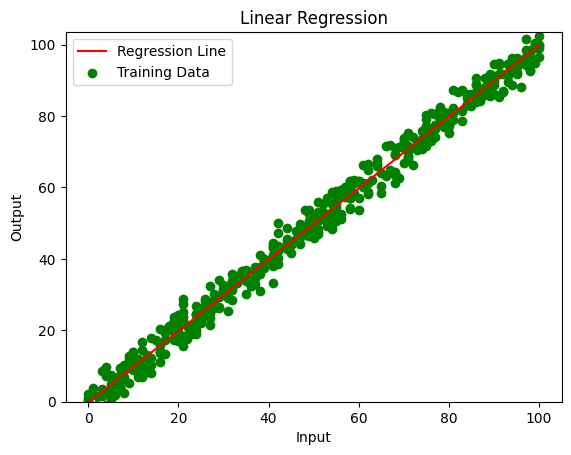

In [17]:
import pandas as pd
import numpy as np

# URL для загрузки данных
url = 'https://raw.githubusercontent.com/AshishJangra27/Machine-Learning-with-Python-GFG/main/Linear%20Regression/data_for_lr.csv'

# Загрузка данных
data = pd.read_csv(url)
print(data)

# Удаление отсутствующих значений
data = data.dropna()

# Обучающий набор данных и метки
train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

# Проверочный набор данных и метки
test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)

# Обучение модели линейной регрессии
linear_reg = LinearRegression()
parameters, loss =linear_reg.train(train_input, train_output, 0.0001, 20)